## 1) Acquiring the Dataset from Kaggle

In [ ]:
!pip install kaggle
!pip install matplotlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105840 sha256=df693c73c904534ce9bc29b7e1e1f51021205a536034899d24a8983c92f3c40e
  Stored in directory: /Users/rushi/Library/Caches/pip/wheels/93/6e/87/6d3385c22c1284be8161dfa643c4a58009b8ee4f0ea9ca54ff
Successfully built kaggle


In [ ]:
# Maintain a kaggle.json file in C:\Users\rushi\.kaggle folder and run the later code snippet to configure kaggle api
!kaggle config set -n api -v kaggle.json

- api is now set to: kaggle.json


In [5]:
# List the datasets available on kaggle
!kaggle datasets list -s diabetic-retinopathy-detection-and-classification


ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mariaherrerot/aptos2019                                             APTOS-2019 dataset                                    8GB  2021-11-17 12:04:06           7135         28  0.5294118        
pkdarabi/diagnosis-of-diabetic-retinopathy                          Diagnosis of Diabetic Retinopathy                    30MB  2024-07-15 16:18:52           3394         89  0.75             
deathtrooper/multichannel-glaucoma-benchmark-dataset                SMDG, A Standardized Fundus Glaucoma Dataset          3GB  2023-04-23 17:05:17           2326         40  1.0              
tanlikesmath/diabetic-retinopathy-resize

In [6]:
# download the dataset
!kaggle datasets download sovitrath/diabetic-retinopathy-224x224-gaussian-filtered


Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered
License(s): CC0-1.0
100%|████████████████████████████████████████| 427M/427M [00:37<00:00, 12.6MB/s]
100%|████████████████████████████████████████| 427M/427M [00:37<00:00, 11.9MB/s]


In [7]:
!unzip -o diabetic-retinopathy-224x224-gaussian-filtered.zip

Archive:  diabetic-retinopathy-224x224-gaussian-filtered.zip
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/05a5183c92d0.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0684311afdfc.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0

## 2) Cleaning the Dataset 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}

diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}

df['binary_type'] =  df['diagnosis'].map(diagnosis_dict_binary.get)
df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head()

,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: ylabel='type'>

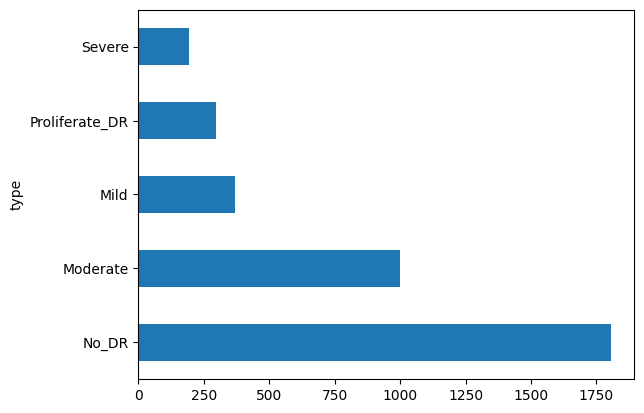

In [3]:
df['type'].value_counts().plot(kind='barh')

In [5]:
from sklearn.model_selection import train_test_split
train_intermediate, val = train_test_split(df, test_size = 0.15, stratify = df['type'])
train, test = train_test_split(train_intermediate, test_size = 0.15 / (1 - 0.15), stratify = train_intermediate['type'])

print("For Training Dataset :")
print(train['type'].value_counts(), '\n')
print("For Testing Dataset :")
print(test['type'].value_counts(), '\n')
print("For Validation Dataset :")
print(val['type'].value_counts(), '\n')

For Training Dataset :
type
No_DR             1263
Moderate           699
Mild               258
Proliferate_DR     207
Severe             135
Name: count, dtype: int64 

For Testing Dataset :
type
No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 

For Validation Dataset :
type
No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 



In [7]:
import os
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

In [9]:
import shutil
src_dir = 'gaussian_filtered_images/gaussian_filtered_images'
for index, row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in val.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(val_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)
 
for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

## 3) Uploading the cleaned dataset to S3 bucket


In [3]:
!aws s3 cp test s3://diabetic-retinopathy-project/gaussian_filtered_images/test --recursive

upload: test/DR/08a3875063c3.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/test/DR/08a3875063c3.png
upload: test/DR/001639a390f0.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/test/DR/001639a390f0.png
upload: test/DR/03676c71ed1b.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/test/DR/03676c71ed1b.png
upload: test/DR/0369f3efe69b.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/test/DR/0369f3efe69b.png
upload: test/DR/07083738b75e.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/test/DR/07083738b75e.png
upload: test/DR/08c17a2d95b7.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/test/DR/08c17a2d95b7.png
upload: test/DR/0519b934f6b1.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/test/DR/0519b934f6b1.png
upload: test/DR/07929d32b5b3.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/test/DR/07929d32b5b3.png
upload: test/DR/03e25101e8e8.png to s3:/

In [4]:
!aws s3 cp train s3://diabetic-retinopathy-project/gaussian_filtered_images/train --recursive

upload: train/DR/00b74780d31d.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/train/DR/00b74780d31d.png
upload: train/DR/00e4ddff966a.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/train/DR/00e4ddff966a.png
upload: train/DR/0024cdab0c1e.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/train/DR/0024cdab0c1e.png
upload: train/DR/0083ee8054ee.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/train/DR/0083ee8054ee.png
upload: train/DR/000c1434d8d7.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/train/DR/000c1434d8d7.png
upload: train/DR/0124dffecf29.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/train/DR/0124dffecf29.png
upload: train/DR/0161338f53cc.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/train/DR/0161338f53cc.png
upload: train/DR/012a242ac6ff.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/train/DR/012a242ac6ff.png
upload: train/DR/01b3aed

In [5]:
!aws s3 cp val s3://diabetic-retinopathy-project/gaussian_filtered_images/val --recursive

upload: val/DR/00a8624548a9.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/val/DR/00a8624548a9.png
upload: val/DR/0180bfa26c0b.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/val/DR/0180bfa26c0b.png
upload: val/DR/03747397839f.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/val/DR/03747397839f.png
upload: val/DR/0104b032c141.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/val/DR/0104b032c141.png
upload: val/DR/02dda30d3acf.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/val/DR/02dda30d3acf.png
upload: val/DR/05a5183c92d0.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/val/DR/05a5183c92d0.png
upload: val/DR/07419eddd6be.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/val/DR/07419eddd6be.png
upload: val/DR/0318598cfd16.png to s3://diabetic-retinopathy-project/gaussian_filtered_images/val/DR/0318598cfd16.png
upload: val/DR/04d029cfb612.png to s3://diabetic-retinop

In [6]:
# Delete the Folders containing data
!rm -rf gaussian_filtered_images
!rm -rf train
!rm -rf val
!rm -rf test

In [ ]:
q